# Maxent results: Showing the lag

In [2]:
%pwd

'/Users/patrickmckenzie/googledrive/projects/flower_color_phenology/notebooks'

In [3]:
%cd ..

/Users/patrickmckenzie/googledrive/projects/flower_color_phenology


### Imports

In [4]:
import numpy as np
import seaborn as sns
import os
import toyplot
import matplotlib.pyplot as plt
import pandas as pd
from dateutil import parser
import statistics
import toyplot.pdf

# Start with the day-of-year heatmap

In [4]:
starter_val=0

In [5]:
density_mat_red = np.genfromtxt(os.path.join('./data/maxent/jan24outputs/red_flowers_linear/',
                                              'red'+'_'+str(starter_val)+".asc"),
                                 delimiter=' ',
                                 skip_header=6)
# remove the nans (maxent saves these as -9999)
density_mat_red[density_mat_red == -9999] = np.nan

In [6]:
density_mat_red.shape

(180, 426)

In [7]:
numdays = 150
allmats = np.zeros((numdays,180,426))
for day in range(0,numdays-1):
    density_mat_red = np.genfromtxt(os.path.join('./data/maxent/jan24outputs/red_flowers_linear/',
                                                  'red'+'_'+str(day)+".asc"),
                                     delimiter=' ',
                                     skip_header=6)
    allmats[day] = density_mat_red

In [8]:
# make an empty matrix
first_max_mat = np.zeros(shape=(density_mat_red.shape))
first_max_mat[:] = -9999

num_nan=0
for row_coordinate in range(allmats.shape[1]):
    for col_coordinate in range(allmats.shape[2]):
        val_list = allmats[:,row_coordinate,col_coordinate]
        if statistics.mode(val_list) == -9999:
            num_nan+=1
            pass
        elif np.sum(val_list > 0.5) == 0:
            first_max_mat[row_coordinate,col_coordinate] = numdays
        else:
            val_list = val_list > 0.5
            first_max_mat[row_coordinate,col_coordinate] = np.argmax(val_list)
first_max_mat[first_max_mat == -9999] = np.nan

In [9]:
red_mat = first_max_mat

In [10]:
numdays = 150
allmats = np.zeros((numdays,180,426))
for day in range(0,numdays-1):
    density_mat_red = np.genfromtxt(os.path.join('./data/maxent/jan24outputs/white_flowers_linear/',
                                                  'white'+'_'+str(day)+".asc"),
                                     delimiter=' ',
                                     skip_header=6)
    allmats[day] = density_mat_red

In [11]:
# make an empty matrix
first_max_mat = np.zeros(shape=(density_mat_red.shape))
first_max_mat[:] = -9999

num_nan=0
for row_coordinate in range(allmats.shape[1]):
    for col_coordinate in range(allmats.shape[2]):
        val_list = allmats[:,row_coordinate,col_coordinate]
        if statistics.mode(val_list) == -9999:
            num_nan+=1
            pass
        elif np.sum(val_list > 0.5) == 0:
            first_max_mat[row_coordinate,col_coordinate] = numdays
        else:
            val_list = val_list > 0.5
            first_max_mat[row_coordinate,col_coordinate] = np.argmax(val_list)
first_max_mat[first_max_mat == -9999] = np.nan

In [12]:
white_mat = first_max_mat

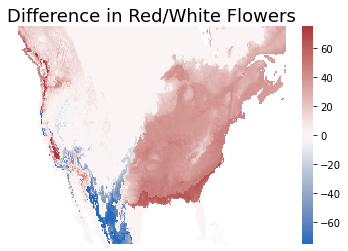

In [294]:
sns.heatmap(red_mat - white_mat, 
            cbar=True,
            xticklabels=False,yticklabels=False,
            cmap=sns.color_palette("vlag", as_cmap=True),
            vmin=-75, 
            vmax=75,
           ).set_title('Difference in Red/White Flowers',fontsize=18);

In [13]:
diffmap = red_mat - white_mat

In [17]:
nanlocs = np.vstack(np.where(np.isnan(diffmap))).T

### Write the final plot

In [165]:
#llocator = toyplot.locator.Explicit([0,1,2], ["Hummingbirds", "Bumblebees","Environment"])
colormap = toyplot.color.brewer.map("BlueRed",
                                    domain_min=-100, 
                                    domain_max=100, 
                                    reverse=True)
#toyplot.matrix((matrix, colormap), label="A matrix", colorshow=True);
canvas, table = toyplot.matrix((diffmap,colormap),
               width=600,
               height=450,
               #llocator=llocator,
               tshow=False,
               lshow=False,
               #step=50,
               colorshow=True,
               #tlabel="Number of Days Between Red and White Flower Blooming"
                  );

for row, col in nanlocs: # set the nan cells to grey
    table.body.cell[row, col].style = {"fill":"#A9A9A9"}
toyplot.pdf.render(canvas,'./days_between_blooming3.pdf')

/Users/patrickmckenzie/miniconda3/envs/py39/lib/python3.10/site-packages/toyplot/canvas.py:837: UserWarning: Warning: converting a masked element to nan.
  cell.title = "%.6f" % matrix[i, j]


# ^that is what is used for Figure 1

# Now calculate for the eastern U.S. the average/median lag

### First get the eastern US

In [33]:
nanlocs = np.vstack(np.where(np.isnan(diffmap[:,207:]))).T # column 207 marks the beginning of "east" for us

In [32]:
#llocator = toyplot.locator.Explicit([0,1,2], ["Hummingbirds", "Bumblebees","Environment"])
colormap = toyplot.color.brewer.map("BlueRed",
                                    domain_min=-100, 
                                    domain_max=100, 
                                    reverse=True)
#toyplot.matrix((matrix, colormap), label="A matrix", colorshow=True);
canvas, table = toyplot.matrix((diffmap[:,207:],colormap),
               width=600,
               height=450,
               #llocator=llocator,
               tshow=False,
               lshow=False,
               #step=50,
               colorshow=True,
               #tlabel="Number of Days Between Red and White Flower Blooming"
                  );

for row, col in nanlocs: # set the nan cells to grey
    table.body.cell[row, col].style = {"fill":"#A9A9A9"}

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="450.0px" viewBox="0 0 600.0 450.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6a14b4f3f0e4401e9583c27bdbfa274e"> 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 nan nan nan nan nan nan nan nan nan nan nan nan 4.000000 nan nan nan 0.000000 15.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 15.000000 11.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 10.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.000000 16.000000 19.000000 16.000000 16.000000 11.000000 2.000000 10.000000 25.000000 26.000000 25.000000 20.000000 16.000000 19.000000 19.000000 16.000000 16.000000 20.000000 21.000000 21.000000 21.000000 23.000000 25.000000 26.000000 27.000000 27.000000 32.000000 32.000000 29.000000 27.000000 29.000000 29.000000 30.000000 30.000000 31.000000 31.000000 30.000000 30.000000 29.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 9.000000 20.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 15.000000 20.000000 16.000000 20.000000 15.000000 0.000000 0.000000 0.000000 0.000000 3.000000 15.000000 16.000000 20.000000 16.000000 13.000000 13.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

In [34]:
eastus = diffmap[:,207:]

In [38]:
eastus_flat = eastus.flatten()

In [39]:
eastus_flat = eastus_flat[~np.isnan(eastus_flat)]

### If screening out zeros:

In [51]:
np.mean(eastus_flat[eastus_flat!=0])

34.73769313690262

In [52]:
np.median(eastus_flat[eastus_flat!=0])

37.0

In [53]:
np.max(eastus_flat[eastus_flat!=0])

66.0

In [54]:
np.min(eastus_flat[eastus_flat!=0])

-4.0

### If not screening out zeros: (This cited in manuscript)

In [44]:
np.mean(eastus_flat)

25.48886057037395

In [47]:
np.median(eastus_flat)

31.0

In [45]:
np.max(eastus_flat)

66.0

In [46]:
np.min(eastus_flat)

-4.0

In [55]:
np.std(eastus_flat)

17.97424153608421

# Maxent Variable Importance Plots

In [1]:
from bs4 import BeautifulSoup

In [8]:
troch_contributions = []
bombus_contributions = []
environ_contributions = []

for daynum in range(351):
    # html_content contains maxent output data for each run
    with open('./data/maxent/jan24outputs/white_flowers_troch_bombus_environ/white_{}.html'.format(daynum)) as f:
        html_content = f.read()

    # parse html
    soup = BeautifulSoup(html_content, 'html.parser')

    # find relevant rows
    rows = soup.find_all('tr', align='right')

    # extract percent contribution for hummingbirds, bombus, and environ
    environ_tot = 0
    for row in rows:
        cells = row.find_all('td')
        if cells[0].text == 'hummingbird_{}'.format(daynum):
            hummingbird_percent = float(cells[1].text)
        elif cells[0].text == 'bombus_{}'.format(daynum):
            bombus_percent = float(cells[1].text)
        else:
            environ_tot += float(cells[1].text) # all other rows

    troch_contributions.append(hummingbird_percent)
    bombus_contributions.append(bombus_percent)
    environ_contributions.append(environ_tot)

In [9]:
llocator = toyplot.locator.Explicit([0,1,2], ["Hummingbirds", "Bumblebees","Environment"])
colormap = toyplot.color.brewer.map("Reds", domain_min=0, domain_max=100, reverse=True)

t = toyplot.matrix((np.array([troch_contributions,bombus_contributions,environ_contributions]),colormap),
               width=2000,
               height=300,
               llocator=llocator,
               #tshow=False,
               step=50,
               colorshow=True,
               tlabel="Percent Contribution of Hummingbirds vs. Bumblebees vs. Environ to WHITE Flower Distribution by Day of Year");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="2000.0px" height="300.0px" viewBox="0 0 2000.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t44d4ccf9914942f28a4c415f6f88610d"> 0 50 100 150 200 250 300 350 Hummingbirds 84.100000 84.600000 87.200000 86.900000 85.700000 85.900000 84.600000 82.200000 78.200000 77.900000 78.200000 74.700000 78.300000 79.600000 77.300000 78.300000 77.100000 74.900000 74.400000 74.300000 70.600000 68.400000 64.400000 67.800000 68.700000 66.400000 61.700000 49.200000 42.200000 31.000000 25.100000 10.500000 30.500000 22.700000 11.100000 11.200000 5.400000 0.300000 0.300000 0.300000 0.200000 0.300000 0.300000 0.300000 0.400000 0.400000 0.300000 0.400000 0.200000 0.700000 0.500000 0.600000 0.700000 0.700000 0.500000 0.700000 0.900000 0.800000 0.800000 1.100000 0.400000 0.400000 0.500000 0.400000 0.400000 0.700000 0.200000 0.500000 0.600000 0.500000 0.600000 0.200000 0.000000 0.000000 0.000000 0.100000 0.000000 0.100000 0.300000 0.200000 0.400000 0.600000 0.900000 1.300000 1.500000 1.400000 2.100000 2.300000 2.700000 3.300000 2.800000 3.100000 3.200000 3.400000 4.400000 4.700000 4.500000 4.700000 4.800000 4.600000 4.800000 5.100000 4.700000 4.600000 5.100000 4.400000 4.500000 4.900000 4.000000 4.200000 3.000000 3.000000 2.600000 2.100000 1.600000 1.300000 1.300000 1.700000 2.500000 5.300000 12.400000 15.700000 22.700000 28.900000 28.600000 19.300000 18.800000 19.500000 15.700000 12.000000 9.900000 21.100000 8.200000 15.300000 5.800000 10.200000 9.100000 9.600000 14.600000 15.200000 15.100000 15.900000 14.600000 19.100000 20.900000 22.900000 20.700000 24.800000 27.900000 28.300000 29.700000 31.000000 31.800000 30.600000 32.000000 31.600000 31.400000 32.700000 34.800000 31.800000 31.300000 34.300000 33.000000 32.800000 35.700000 38.200000 36.700000 37.900000 37.600000 43.500000 39.900000 40.500000 38.600000 37.700000 42.200000 47.600000 39.900000 43.000000 43.600000 36.700000 39.200000 37.000000 37.700000 41.400000 43.800000 46.300000 43.300000 43.300000 47.200000 47.200000 43.500000 49.200000 50.600000 49.100000 53.100000 53.500000 56.600000 56.200000 55.000000 52.900000 55.300000 59.900000 53.800000 53.600000 54.600000 55.000000 53.700000 50.100000 47.800000 46.400000 47.700000 47.500000 46.600000 45.400000 41.900000 38.500000 38.100000 36.300000 37.300000 31.100000 31.100000 35.500000 36.500000 36.100000 42.600000 50.900000 42.600000 45.500000 51.000000 50.500000 50.000000 51.200000 51.000000 50.600000 52.500000 48.500000 50.700000 51.900000 50.400000 54.100000 55.600000 56.900000 56.800000 58.300000 59.200000 59.600000 58.800000 52.800000 55.100000 52.000000 54.800000 51.300000 54.100000 53.600000 48.300000 50.400000 49.000000 47.200000 49.200000 46.000000 46.200000 42.000000 42.000000 39.700000 39.500000 37.600000 37.200000 30.400000 27.200000 24.400000 23.700000 23.800000 20.700000 21.500000 18.200000 18.600000 16.600000 17.300000 17.200000 19.100000 18.700000 21.600000 20.700000 24.800000 23.700000 25.800000 24.000000 24.800000 24.800000 25.400000 24.900000 25.300000 27.500000 25.100000 25.400000 24.700000 25.100000 25.900000 23.400000 24.900000 23.900000 22.400000 23.200000 23.700000 24.200000 25.700000 27.500000 31.200000 30.500000 32.800000 33.100000 35.600000 37.000000 35.200000 34.900000 40.000000 41.900000 43.100000 45.100000 40.600000 49.300000 45.300000 34.000000 32.200000 38.900000 38.700000 39.000000 37.500000 36.100000 29.000000 22.500000 31.800000 28.700000 32.300000 27.700000 22.600000 31.700000 30.200000 46.600000 44.200000 68.700000 63.100000 59.500000 73.700000 85.300000 84.800000 88.700000 84.500000 76.800000 81.70000

In [10]:
troch_contributions = []
bombus_contributions = []
environ_contributions = []

for daynum in range(351):
    # html_content contains maxent output data for each run
    with open('./data/maxent/jan24outputs/red_flowers_troch_bombus_environ/red_{}.html'.format(daynum)) as f:
        html_content = f.read()

    # parse html
    soup = BeautifulSoup(html_content, 'html.parser')

    # find relevant rows
    rows = soup.find_all('tr', align='right')

    # extract percent contribution for hummingbirds, bombus, and environ
    environ_tot = 0
    for row in rows:
        cells = row.find_all('td')
        if cells[0].text == 'hummingbird_{}'.format(daynum):
            hummingbird_percent = float(cells[1].text)
        elif cells[0].text == 'bombus_{}'.format(daynum):
            bombus_percent = float(cells[1].text)
        else:
            environ_tot += float(cells[1].text)

    troch_contributions.append(hummingbird_percent)
    bombus_contributions.append(bombus_percent)
    environ_contributions.append(environ_tot)

In [11]:
llocator = toyplot.locator.Explicit([0,1,2], ["Hummingbirds", "Bumblebees","Environment"])
colormap = toyplot.color.brewer.map("Reds", domain_min=0, domain_max=100, reverse=True)

t = toyplot.matrix((np.array([troch_contributions,bombus_contributions,environ_contributions]),colormap),
               width=2000,
               height=300,
               llocator=llocator,
               #tshow=False,
               step=50,
               colorshow=True,
               tlabel="Percent Contribution of Hummingbirds vs. Bumblebees vs. Environ to RED Flower Distribution by Day of Year");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="2000.0px" height="300.0px" viewBox="0 0 2000.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3ff7897e5ae64cfa85c57b130da857db"> 0 50 100 150 200 250 300 350 Hummingbirds 88.700000 88.500000 89.200000 89.700000 92.700000 91.700000 89.700000 89.500000 91.200000 90.300000 92.800000 90.500000 92.800000 92.500000 92.600000 93.400000 94.800000 94.100000 93.700000 94.600000 92.900000 92.600000 92.100000 92.800000 93.200000 94.600000 95.400000 94.700000 94.900000 94.100000 92.900000 92.800000 92.900000 91.300000 91.500000 92.100000 90.300000 91.900000 91.700000 92.500000 89.000000 89.400000 88.400000 90.000000 90.800000 90.600000 90.400000 88.700000 88.700000 84.800000 75.700000 80.900000 73.700000 66.500000 66.400000 72.700000 65.700000 72.300000 65.800000 57.300000 63.800000 62.200000 63.400000 68.700000 62.400000 69.700000 61.700000 54.700000 60.600000 59.600000 61.800000 63.500000 62.100000 62.700000 59.900000 51.300000 49.400000 51.200000 57.500000 55.700000 54.400000 56.100000 59.100000 60.100000 67.000000 60.200000 66.600000 64.100000 63.900000 63.400000 66.600000 66.500000 65.400000 61.200000 64.700000 60.300000 63.200000 65.300000 70.400000 69.900000 73.500000 74.600000 76.700000 80.300000 83.300000 81.600000 86.900000 88.500000 87.900000 89.200000 88.800000 88.800000 90.300000 89.900000 91.900000 92.300000 90.400000 90.700000 89.700000 92.000000 89.000000 87.600000 86.200000 81.900000 81.900000 79.000000 78.400000 78.200000 66.300000 70.100000 70.500000 69.600000 70.500000 69.500000 69.800000 66.200000 69.900000 66.600000 69.100000 69.500000 70.200000 70.100000 64.800000 73.800000 67.600000 77.900000 70.400000 76.800000 79.100000 78.400000 91.500000 90.400000 92.800000 92.700000 92.000000 95.800000 95.600000 97.200000 93.100000 88.500000 87.400000 91.700000 92.300000 92.700000 89.800000 91.300000 90.100000 89.800000 91.300000 89.400000 90.900000 89.700000 90.400000 94.800000 91.000000 91.000000 92.900000 92.600000 93.400000 93.600000 94.300000 93.700000 95.000000 93.500000 93.700000 95.800000 96.700000 98.700000 97.200000 99.200000 97.600000 97.800000 98.200000 95.800000 97.500000 96.800000 97.900000 96.700000 96.600000 93.000000 91.200000 94.200000 93.200000 95.900000 92.700000 93.100000 88.400000 89.500000 84.800000 79.800000 84.800000 87.000000 82.900000 87.500000 89.000000 91.900000 91.300000 92.300000 93.100000 94.000000 93.200000 91.600000 91.300000 92.300000 93.500000 93.200000 92.800000 91.100000 89.100000 86.100000 85.300000 85.800000 85.700000 88.400000 88.300000 87.000000 88.700000 89.400000 89.900000 89.300000 88.700000 90.500000 90.800000 91.200000 91.400000 89.500000 90.800000 92.900000 92.400000 91.700000 91.300000 91.200000 89.300000 91.300000 91.600000 89.400000 89.600000 89.200000 87.900000 87.300000 87.400000 86.300000 81.300000 81.300000 80.400000 80.400000 77.500000 76.600000 77.600000 70.600000 66.800000 67.200000 62.500000 63.000000 60.200000 54.200000 54.900000 48.000000 45.400000 38.400000 39.200000 38.200000 27.300000 19.200000 22.300000 17.000000 8.700000 8.900000 0.300000 0.000000 0.100000 8.400000 4.300000 0.100000 0.000000 0.000000 1.400000 0.000000 4.400000 8.800000 13.400000 21.800000 20.100000 18.200000 19.900000 21.800000 22.600000 22.800000 28.600000 37.500000 30.300000 39.200000 37.800000 37.100000 44.000000 49.500000 51.400000 57.700000 57.800000 53.100000 56.500000 41.500000 35.300000 33.400000 43.100000 37.900000 35.200000 41.900000 23.300000 29.300000 23.500000 20.100000 25.700000 30.300000 40.500000 33.800000 49.100000 77.700000 70.500000 65.100000 72.500000 65.400000 67.